In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ready_data_030.csv',low_memory=False)

In [3]:
data_list = ['Electricity - Gross production',
            #'Electricity - net production',
            #'Electricity - total production, main activity',
            #'Electricity - total production, autoproducer',
            'Electricity - total thermal production',
            'Electricity - total nuclear production',
            'Electricity - total geothermal production',
            'Electricity - total hydro production',
            'Electricity - total solar production',
            'Electricity - total tide, wave production',
            'Electricity - total wind production',
            'From chemical heat – Autoproducer',
            'From chemical heat – Main activity',
            'From other sources – Autoproducer',
            'From other sources – Main activity']

In [5]:
df2 = df
df2=df2.drop(['unit', 'quantity', 'CL4','CL3','CL2','commodity', 'L1','L2','L3','L4'], axis=1)

In [6]:
def f_test2(row):
    if row == 'heat':
        return 1
    else:
        return 0  
def f_test(row):
    if row in data_list:
        return 1
    else:
        return 0

In [8]:
df3 = df2['commodity_transaction'].apply(f_test)
df31 = df2['category'].apply(f_test2)

df3 = pd.Series(df3)
df31 = pd.Series(df31)

df2['x'] = df3
df2['x2'] = df31
df4 = df2[(df2.x > 0) & (df2.x2 < 1)]
df5 = df4.groupby(['country_or_area','commodity_transaction','year']).sum().reset_index()

In [19]:
top30 = df5[df5.commodity_transaction == 'Electricity - total thermal production'].groupby(['country_or_area']).sum().sort_values(by='new_quantity',ascending=False).head(30)
top30_country = top30.index
top30_country

# 3 countries

In [141]:
# category_names_plot = {'Electricity - Gross production':'Electricity production',
# 'Electricity - total geothermal production':'Geothermal',
# 'Electricity - total hydro production':'Hydro',
# 'Electricity - total nuclear production':'Nuclear Power Plant',
# 'Electricity - total solar production':'Solar', 
# 'Electricity - total wind production':'Wind',
# 'Electricity - total thermal production':'Combustible fuels',
# 'From other sources – Main activity':'Other-main',
# 'From other sources – Autoproducer':'Other-auto'
#     }

category_names_plot = {'Electricity - Gross production':['Electricity production','black'],
'Electricity - total geothermal production':['Geothermal','purple'],
'Electricity - total hydro production':['Hydro','blue'],
'Electricity - total nuclear production':['Nuclear Power Plant','red'],
'Electricity - total solar production':['Solar','orange'], 
'Electricity - total wind production':['Wind','green'],
'Electricity - total thermal production':['Combustible fuels','gray'],
'From other sources – Main activity':['Other-main','orchid'],
'From other sources – Autoproducer':['Other-auto','orchid']
    }

In [1]:
# ddd = {'United States':
#        {'1':["9/11 - WTC",(2001, 3900),(1998, 4350)],
#        '2':["Upadek Banku Lehman Brothers",(2009, 4150),(2006.5, 3750)]},
#        'China':
#        {'1':}, 'Japan':1}

In [136]:
countries3 = ['United States', 'China', 'Japan']
def f_draw_arrow(text,ar_corr,text_corr):
        plt.annotate(text,
            xy=ar_corr, xycoords='data',size=20,
            xytext=text_corr, textcoords='data',
            bbox=dict(boxstyle="round4", fc="w"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))


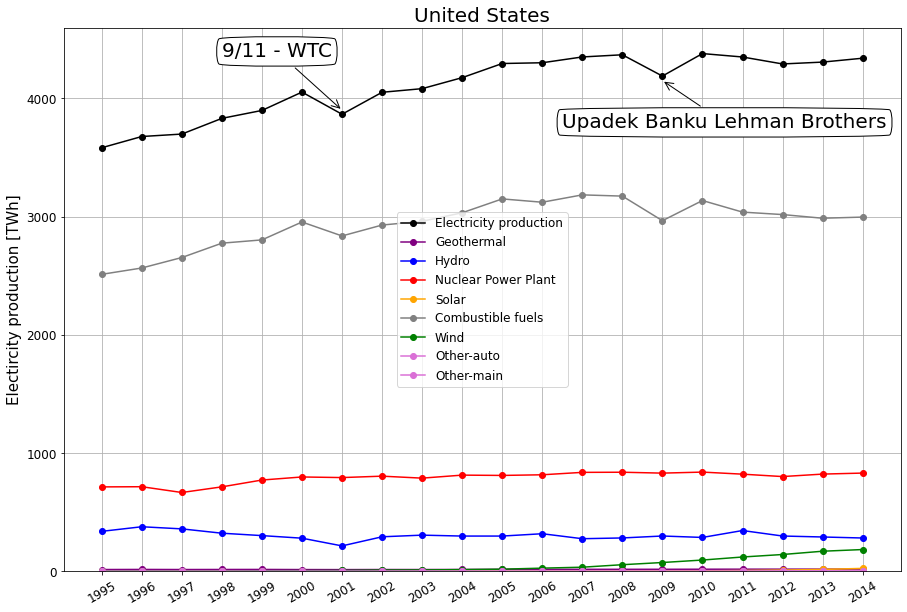

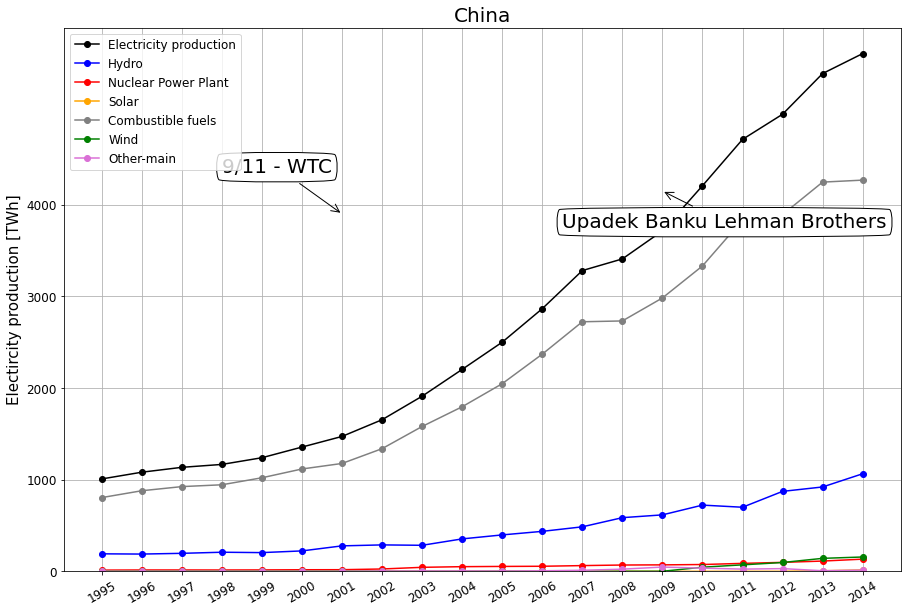

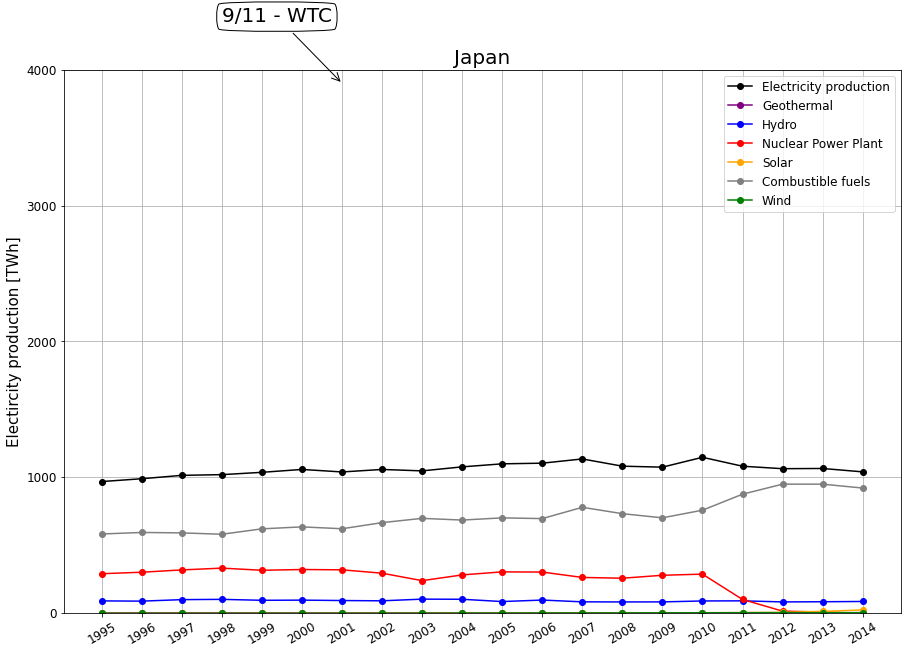

In [153]:
ddd=1

for country in countries3:
#     plt.figure(facecolor='yellow')
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor("white")
    plt.grid()
    cat_list = list(df5[(df5.country_or_area == country) & (df5.year == 2014)].commodity_transaction)
    for j in cat_list:
        jj = category_names_plot[j][0]
        line_color = category_names_plot[j][1]
        lts = np.array([])
        year = np.array([])
        for i in range(1995,2015):
            to_print = df5[(df5.country_or_area == country) & (df5.year == i) & (df5.commodity_transaction == j)].new_quantity/1000000 # in TWh
#             to_print = df5[(df5.commodity_transaction.isin(cat_list)) & (df5.country_or_area == dd) & (df5.year == i) & (df5.commodity_transaction == j)].new_quantity
            if len(to_print) > 0:
                lts = np.append(lts,to_print.to_numpy())
            else:
                lts = np.append(lts,0)
            year = np.append(year,i)
        plt.plot(year,lts, marker='o',label=jj,color=line_color)
        plt.legend(fontsize=12)
#         plt.grid()
        plt.title(country,fontsize=20)
    plt.xticks(np.arange(1995, 2015, 1),fontsize=12)
    plt.xticks(rotation=30)
    plt.yticks(np.arange(0, 4500, 1000),fontsize=12)
#     plt.xlim([1994,2015,1])
#     plt.ylim([0, 10**10])
    plt.ylim(ymin=0)
    plt.ylabel('Electircity production [TWh]',fontsize=15)
    fig_name = [str(ddd),'_electricity_',str(country),'_detailed.png']
    fig_name = ''.join(fig_name)
#     plt.savefig(fig_name)
#     plt.grid()
    f_draw_arrow("9/11 - WTC",(2001, 3900),(1998, 4350))
    f_draw_arrow("Upadek Banku Lehman Brothers",(2009, 4150),(2006.5, 3750))   
    plt.show()
    plt.close()    
    ddd+=1           

#     break